### Analyzing the Stroop Effect by Andrew Ferguson
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

The independent variable in the stroop effect is the congruent conditions (text color matches word). The dependent variable is the incongruent condition (text color does not match word).

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

Null: Congruent samples are less than or equal to incongruent times

Alternative: Congruent sample times are greater than incongruent times


Given that we are using two variables where the values have infinite possibilities, a simple linear regression model may work.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [31]:
# Perform the analysis here
import pandas as pd
import numpy as np
import statsmodels.api as sm
% matplotlib inline 

df = pd.read_csv('stroopdata.csv')

df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


As a measure of central tendency: on average the congruent time was 14.05 seconds whereas the incongruent was 22.01 seconds.

As a measure of variance the standard deviation for the congruent test was 3.55 seconds whereas incongruent was 4.79 seconds.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

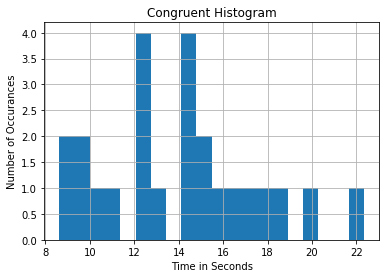

In [32]:
bar_plot = df['Congruent'].hist(bins=20)
bar_plot.set_title("Congruent Histogram")
bar_plot.set_xlabel("Time in Seconds")
bar_plot.set_ylabel("Number of Occurances");

This congruent histogram has a small sample size with a very faint right skewed distribution.

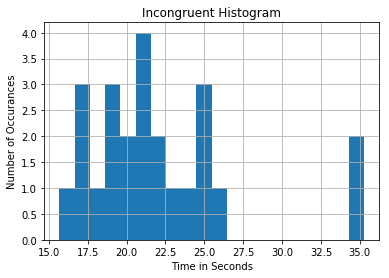

In [33]:
bar_plot2 = df['Incongruent'].hist(bins=20)
bar_plot2.set_title("Incongruent Histogram")
bar_plot2.set_xlabel("Time in Seconds")
bar_plot2.set_ylabel("Number of Occurances");

The incongruent looks like a somewhat normal distribution for the small sample size it has, but has one outlier to the right.

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [34]:
df['intercept'] = 1

lm = sm.OLS(df['Incongruent'], df[['intercept', 'Congruent']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Incongruent   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     3.108
Date:                Thu, 22 Feb 2018   Prob (F-statistic):             0.0918
Time:                        02:46:17   Log-Likelihood:                -69.590
No. Observations:                  24   AIC:                             143.2
Df Residuals:                      22   BIC:                             145.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     15.3535      3.894      3.943      0.001       7.278      23.429
Congruent      0.4742      0.269      1.763      0.092      -0.084       1.032
==============================================================================
Omnibus:                       15.513   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.580
Skew:                           1.593   Prob(JB):                     0.000414
Kurtosis:                       5.330   Cond. No.                         60.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the information above we fail to reject the null hypothesis. A few critical values of note: our R-squared value is very close to 0 which implies the wide range of variance this sample size has, and our regression line does not fit well at all. Our P value when comparing to congruent times is statistically insignificant (also likely due to the small sample size).